In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from Bio import SeqIO
import logomaker as lm
import gzip
import pickle

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.facecolor']='#EEEEEE'

In [2]:
codontab = {
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L',
    'TAC': 'Y', 'TAT': 'Y',
    'TAA': '*', 'TAG': '*', 'TGA': '*',
    'TGC': 'C', 'TGT': 'C',
    'TGG': 'W',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 'AGA': 'R', 'AGG': 'R',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G'
}

In [3]:
transcript_FASTA_path = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/FASTA/gencode.vM27.pc_transcripts.fa.gz'
tmp = SeqIO.to_dict(SeqIO.parse(gzip.open(transcript_FASTA_path, mode='rt'), 'fasta'))

T_fa = {}
for ID in tmp:
    T_fa[ID.split('.')[0]] = tmp[ID]

In [4]:
Sig_Stalling = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult_sig.tsv', sep='\t')
Sig_Stalling['transcript_id'] = Sig_Stalling['transcript_id'].str.split('.').str[0]


asite_codon = []
ext5, ext3 = 15+12, 12+12
bands = []
bands_AA = []
for T_ID, asite_pos in zip(Sig_Stalling['transcript_id'], Sig_Stalling['asite']):
    asite_codon.append(str(T_fa[T_ID].seq[asite_pos:asite_pos+3]).replace('T','U'))
    band = str(T_fa[T_ID].seq[asite_pos-ext5:asite_pos+3+ext3]).replace('T','U')
    bands.append(band)
    bands_AA.append(''.join([codontab[band[i:i+3].replace('U','T')] for i in range(0, len(band), 3)]))
    

Sig_Stalling['codon-asite_confirm'] = asite_codon
Sig_Stalling[f'Nearby_Seq_-{ext5}_+{ext3+2}'] = bands
Sig_Stalling[f'Nearby_Seq_-{ext5}_+{ext3+2}_AA'] = bands_AA

if sum(Sig_Stalling['codon-asite'] == Sig_Stalling['codon-asite_confirm']) == len(Sig_Stalling) : 
    print('No A-site codon discrepancy checked.')
else:
    print('Warning : A-site codon discrepancy.')

display(Sig_Stalling)

No A-site codon discrepancy checked.


,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR,codon-asite_confirm,Nearby_Seq_-27_+26,Nearby_Seq_-27_+26_AA
0,ENSMUST00000000001,267,126,GAA,E,2.663253,0.002675,0.369862,4.078550,4.411021e-06,0.000737,GAA,GUGAAGCUGCUGCUGCUCGGCGCUGGAGAAUCUGGUAAAAGUACCA...,VKLLLLGAGESGKSTIVK
1,ENSMUST00000000001,330,189,GAC,D,0.232194,0.000008,0.002639,0.409897,3.295029e-03,0.198856,GAC,AUCAUUCAUGAGGACGGCUAUUCAGAGGACGAAUGUAAACAGUAUA...,IIHEDGYSEDECKQYKVV
2,ENSMUST00000000001,429,288,GAA,E,1.507714,0.005393,0.450347,2.074848,3.258707e-07,0.000109,GAA,AUGGGACGGUUGAAGAUUGAUUUUGGGGAAUCUGCCAGAGCAGAUG...,MGRLKIDFGESARADDAR
3,ENSMUST00000000001,1029,888,GAA,E,1.995022,0.138542,1.000000,4.391403,1.565865e-04,0.017433,GAA,CCAGAAUACACAGGUUCCAAUACAUACGAAGAGGCAGCUGCUUACA...,PEYTGSNTYEEAAAYIQC
4,ENSMUST00000000080,310,153,GAA,E,1.550548,0.402057,1.000000,3.975017,8.970882e-05,0.013367,GAA,AUCUUCCAGGAACUACAGAUUGUGCACGAAACGGGCUACUUCUCGG...,IFQELQIVHETGYFSALP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,ENSMUST00000119704,187,126,GAA,E,inf,0.011079,0.119103,inf,1.076438e-02,0.077145,GAA,GAUGCGUGCAUCAUUGAGAAAGGAGAAGAACACUGUGGACAUCUCA...,DACIIEKGEEHCGHLIEA
32772,ENSMUST00000179865,661,477,GAA,E,inf,0.034824,0.236098,inf,2.695256e-03,0.024047,GAA,UAUGAGGUUAAUUUUCAGAAUGGAAUAGAAUGUGGUGGUGCCUAUG...,YEVNFQNGIECGGAYVKL
32773,ENSMUST00000225805,1227,1065,GAA,E,inf,0.002096,1.000000,inf,1.429246e-04,0.073177,GAA,CAGUACAGGCAGCAGAUUGAAGAACUAGAAAACCAUCUUGCCACUC...,QYRQQIEELENHLATQAS
32774,ENSMUST00000239402,188,165,UAU,Y,inf,0.063508,0.457000,inf,8.853046e-03,0.068410,UAU,AGUGACGGCCUGUGGCUUGUAGAAUUUUAUGCACCAUGGUGUGGUC...,SDGLWLVEFYAPWCGHCQ


In [5]:
logo_dict = {}


tmp = Sig_Stalling[(Sig_Stalling['D8_FDR']<0.01) & (Sig_Stalling['D8_OR']>1)].reset_index(drop=True)

AA_seq_table = pd.DataFrame()
for i in range(len(tmp.iloc[0,-1])):
    AA_seq_table[i] = tmp[f'Nearby_Seq_-{ext5}_+{ext3+2}_AA'].str[i]

tmp_list = []
for i in AA_seq_table:
    tmp_list.append(AA_seq_table[i].value_counts())
AA_seq_count = pd.concat(tmp_list, axis=1).drop(index='*', errors='ignore').replace(np.nan, 0)
AA_seq_count = AA_seq_count.sort_index().T

logo_dict['8d_Up'] = lm.transform_matrix(AA_seq_count, from_type='counts', to_type='information')

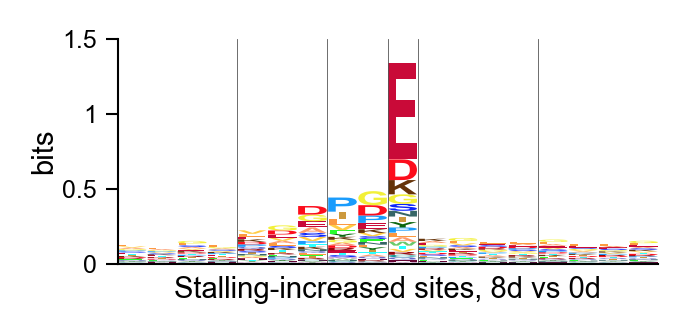

In [6]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.15
nrow, ncol = 1, 1

width_ratios = [1.8]
height_ratios = [0.75]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for day in logo_dict:
    ax = fig.add_subplot(grid[row,col])

    RPF_start = 4
    # ax.axvspan(RPF_start-0.5,   RPF_start-0.5+10, 0, 1, color='#E5E5E5', lw=0, zorder=-1)
    # ax.axvspan(RPF_start-0.5+3, RPF_start-0.5+6, 0, 1,  color='#D5D5D5', lw=0, zorder=-1)
    # ax.axvspan(RPF_start-0.5+5, RPF_start-0.5+6, 0, 1,  color='#BBBBBB', lw=0, zorder=-1)
    ax.axvline(RPF_start-0.5,    c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+3,  c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+5,  c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+6,  c='#555555', lw=0.2)
    ax.axvline(RPF_start-0.5+10, c='#555555', lw=0.2)

    lm.Logo(logo_dict[day],
            color_scheme='skylign_protein',
            font_name='Arial',
            ax=ax)
    
    ax.set_ylim(0, 1.5)
    ax.set_xticks([])
    ax.set_yticks([0, 0.5, 1, 1.5])
    ax.set_yticklabels([0, 0.5, 1, 1.5])
    ax.tick_params(length=3, width=0.5, pad=2)
    if row!=(nrow-1) : ax.set_xticklabels([])

    ax.set_xlabel('Stalling-increased sites, 8d vs 0d', labelpad=3)
    ax.set_ylabel('bits', labelpad=1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    row+=1

plt.savefig('adi_SigUpStalling_SeqLogo.pdf', bbox_inches='tight')
plt.show()
plt.close()